In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds_bal=pd.read_csv("Balance.csv",header=None)
ds_bal.columns=("Class-Name","Left-Weight","Left-Distance","Right-Weight","Right-Distance")
ds_bal

,Class-Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
...,...,...,...,...,...
620,L,5,5,5,1
621,L,5,5,5,2
622,L,5,5,5,3
623,L,5,5,5,4


### Checking Null Values

In [3]:
ds_bal.isnull().sum()

Class-Name        0
Left-Weight       0
Left-Distance     0
Right-Weight      0
Right-Distance    0
dtype: int64

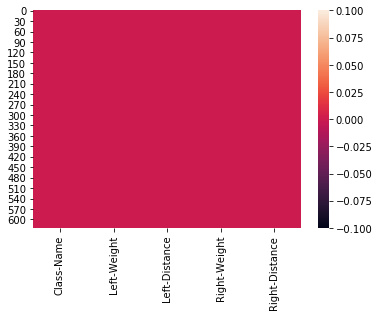

In [4]:
sns.heatmap(ds_bal.isnull())

### Describing Info

In [5]:
ds_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class-Name      625 non-null    object
 1   Left-Weight     625 non-null    int64 
 2   Left-Distance   625 non-null    int64 
 3   Right-Weight    625 non-null    int64 
 4   Right-Distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


### Univariate Analysis

In [1]:
plt.figure(figsize = (20,5))
sns.countplot(ds_bal["Class-Name"])

NameError: name 'plt' is not defined

### Bivariate Analysis

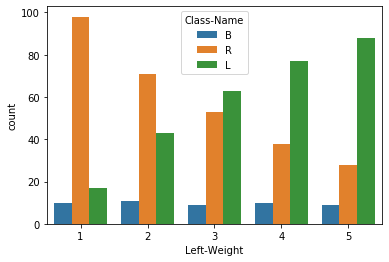

In [7]:
sns.countplot(ds_bal["Left-Weight"],hue="Class-Name",data=ds_bal)

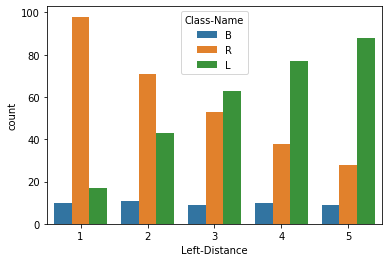

In [8]:
sns.countplot(ds_bal["Left-Distance"],hue="Class-Name",data=ds_bal)

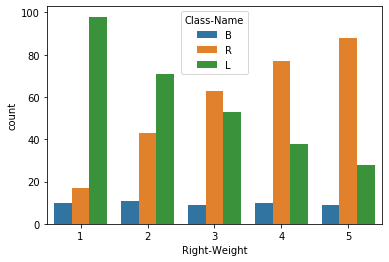

In [9]:
sns.countplot(ds_bal["Right-Weight"],hue="Class-Name",data=ds_bal)

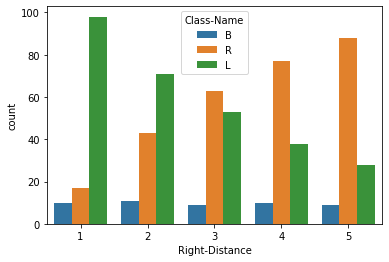

In [10]:
sns.countplot(ds_bal["Right-Distance"],hue="Class-Name",data=ds_bal)

In [11]:
ds_bal["Class-Name"].value_counts()

L    288
R    288
B     49
Name: Class-Name, dtype: int64

### Resampling

In [12]:
from sklearn.utils import resample

In [13]:
ds_R=ds_bal[ds_bal["Class-Name"]=="R"]
ds_L=ds_bal[ds_bal["Class-Name"]=="L"]
ds_B=ds_bal[ds_bal["Class-Name"]=="B"]
ds_B_new=resample(ds_B,replace=True,n_samples=288,random_state=123)
ds_new=pd.concat([ds_R,ds_L,ds_B_new])

In [14]:
ds_new.shape

(864, 5)

In [15]:
ds_new["Class-Name"].value_counts()

R    288
B    288
L    288
Name: Class-Name, dtype: int64

### Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()
ds_new["Class-Name"]=le.fit_transform(ds_new["Class-Name"])
ds_new

,Class-Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
1,2,1,1,1,2
2,2,1,1,1,3
3,2,1,1,1,4
4,2,1,1,1,5
5,2,1,1,2,1
...,...,...,...,...,...
246,0,2,5,5,2
546,0,5,2,5,2
598,0,5,4,5,4
338,0,3,4,3,4


### Seperating Target and Input Variable

In [18]:
x=ds_new.iloc[:,1:]
x

,Left-Weight,Left-Distance,Right-Weight,Right-Distance
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5
5,1,1,2,1
...,...,...,...,...
246,2,5,5,2
546,5,2,5,2
598,5,4,5,4
338,3,4,3,4


In [19]:
y=ds_new.iloc[:,0]
y

1      2
2      2
3      2
4      2
5      2
      ..
246    0
546    0
598    0
338    0
60     0
Name: Class-Name, Length: 864, dtype: int32

### Splitting Training and Testing

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=56,stratify=y)

### Importing Classification Algorithim

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

### Putting Aliases

In [23]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(criterion='entropy',random_state=19)
GNB=GaussianNB()
RFC=RandomForestClassifier(random_state=19)
GBC=GradientBoostingClassifier(random_state=19)
ABC=AdaBoostClassifier(n_estimators=80,random_state=19)
ETC=ExtraTreesClassifier(criterion='entropy',random_state=19)

In [24]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

### Importing Metrices

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### Machine Learning

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score =  0.8034682080924855


Cross_Val_Score =  0.7558406843090083


classification_report
               precision    recall  f1-score   support

           0       0.67      0.84      0.75        58
           1       0.84      0.83      0.83        58
           2       0.98      0.74      0.84        57

    accuracy                           0.80       173
   macro avg       0.83      0.80      0.81       173
weighted avg       0.83      0.80      0.81       173



[[49  9  0]
 [ 9 48  1]
 [15  0 42]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


*********************** SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=80, random_state=19)


Accuracy_score =  0.8265895953757225


Cross_Val_Score =  0.7765036086607859


classification_report
               precision    recall  f1-score   support

           0       0.66      1.00      0.79        58
           1       1.00      0.76      0.86        58
           2       1.00      0.72      0.84        57

    accuracy                           0.83       173
   macro avg       0.89      0.83      0.83       173
weighted avg       0.89      0.83      0.83       173



[[58  0  0]
 [14 44  0]
 [16  0 41]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)




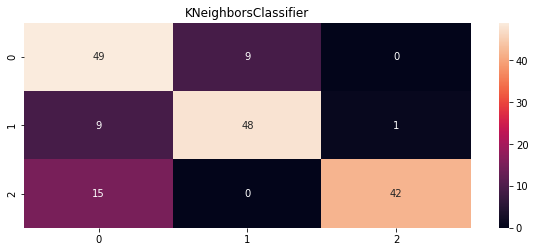

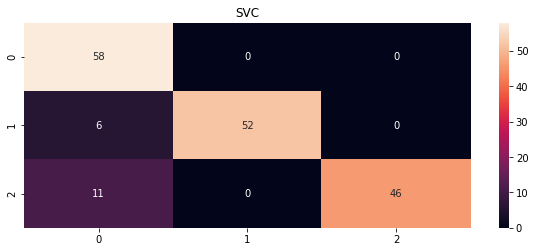

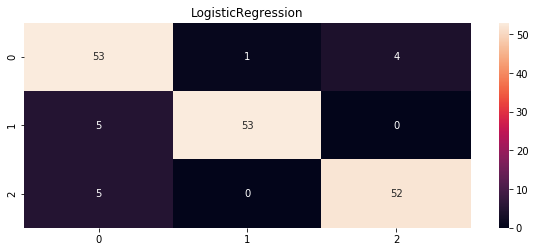

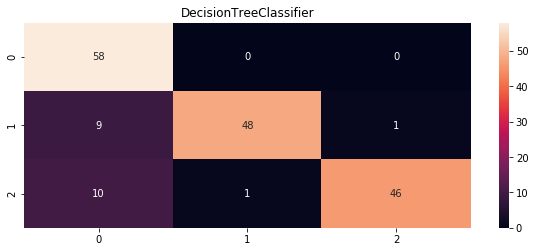

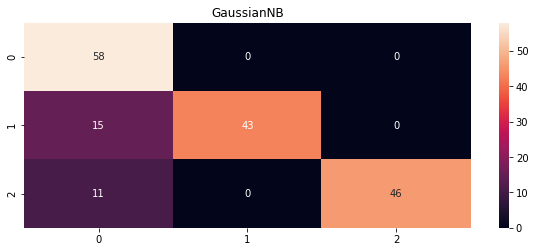

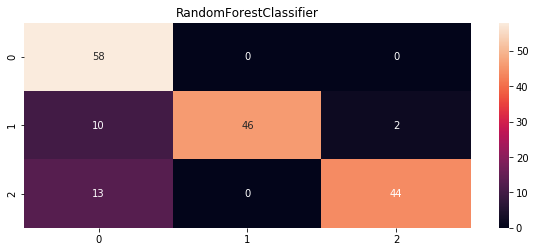

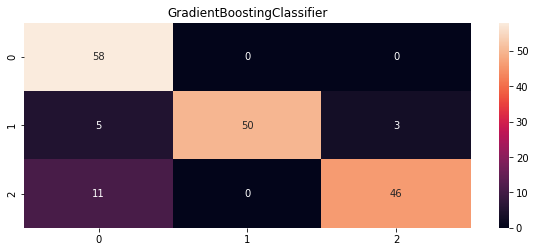

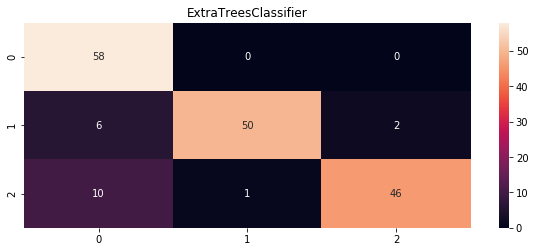

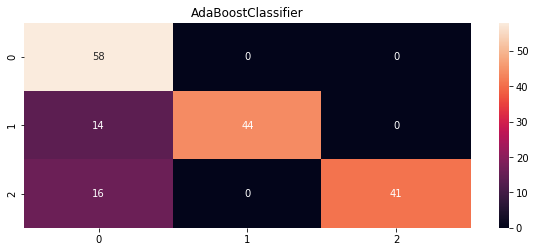

In [26]:
Model = []
score = []
cvs=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    print('\n')

### Creating Compare Table

In [27]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,80.346821,75.584068
1,SVC,90.173410,87.397755
2,LogisticRegression,91.329480,91.443464
3,DecisionTreeClassifier,87.861272,79.298316
4,GaussianNB,84.971098,69.939856
5,RandomForestClassifier,85.549133,75.932906
6,GradientBoostingClassifier,89.017341,78.715584
7,ExtraTreesClassifier,89.017341,79.750067
8,AdaBoostClassifier,82.658960,77.650361


### Hyperparameter Tuning

#### SVC

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
parameterSV={"kernel":["rbf","poly","linear"],
            "C":[1,10,100,1000]}
gridSV=GridSearchCV(SV,param_grid=parameterSV,n_jobs=-1,cv=5)
gridSV.fit(x_train,y_train)
gridSV.best_score_,gridSV.best_params_

(1.0, {'C': 10, 'kernel': 'poly'})

In [30]:
SV=SVC(C=10,kernel="poly")
SV.fit(x_train,y_train)
score=cross_val_score(SV,x,y,cv=10,scoring="accuracy").mean()
score

0.9942261427425821

#### Random Forest Classifier

In [31]:
parameterRFC={"n_estimators":[20,30,40,50,60,70,80,90,100],
             "criterion":["gini","entropy"],
             "max_features":["auto","sqrt","log2"],
             "max_depth":[2,3,4,5,6,None]}
gridRFC=GridSearchCV(RFC,param_grid=parameterRFC,n_jobs=-1,cv=10)
gridRFC.fit(x_train,y_train)
gridRFC.best_score_,gridRFC.best_params_

(0.8942650103519669,
 {'criterion': 'gini',
  'max_depth': None,
  'max_features': 'auto',
  'n_estimators': 50})

In [32]:
RFC=RandomForestClassifier(criterion="gini",max_depth=None,max_features="auto",n_estimators=50)
RFC.fit(x_train,y_train)
score=cross_val_score(RFC,x,y,cv=10,scoring="accuracy").mean()
score

0.7756081261694734

#### KNearest Neighbor Classifier 

In [33]:
leaf_size=list(range(1,50))
n_neighbors=list(range(1,30))
p=[1,2]
parameterKNN=dict(leaf_size=leaf_size,n_neighbors=n_neighbors,p=p)
gridKNN=GridSearchCV(KNN,param_grid=parameterKNN,n_jobs=-1,cv=10)
gridKNN.fit(x_train,y_train)
gridKNN.best_score_,gridKNN.best_params_

(0.8624430641821945, {'leaf_size': 39, 'n_neighbors': 1, 'p': 1})

In [34]:
KNN=KNeighborsClassifier(leaf_size=39,n_neighbors=1,p=1)
KNN.fit(x_train,y_train)
score=cross_val_score(RFC,x,y,cv=10,scoring="accuracy").mean()
score

0.7756081261694734

#### Decision Tree Classifier

In [35]:
parameterDT={"criterion":["gini","entropy"],
           "max_depth":range(1,10),
           "min_samples_split":range(1,10),
           "min_samples_leaf":range(1,5)}
gridDT=GridSearchCV(DT,param_grid=parameterDT,n_jobs=-1,cv=10)
gridDT.fit(x_train,y_train)
gridDT.best_score_,gridDT.best_params_

(0.8798550724637682,
 {'criterion': 'entropy',
  'max_depth': 9,
  'min_samples_leaf': 1,
  'min_samples_split': 4})

In [36]:
DT=DecisionTreeClassifier(criterion="entropy",max_depth=9,min_samples_leaf=1,min_samples_split=4)
DT.fit(x_train,y_train)
score=cross_val_score(DT,x,y,cv=10,scoring="accuracy").mean()
score

0.7743918738305267

#### Gradient Boosting

In [ ]:
parameterGBC={'learning_rate': [0.01,0.02,0.03],
             'subsample'    : [0.9, 0.5, 0.2],
             'n_estimators' : [100,500,1000],
             'max_depth'    : [4,6,8]}
gridGBC=GridSearchCV(GBC,param_grid=parameterGBC,n_jobs=-1,cv=10)
gridGBC.fit(x_train, y_train)
gridGBC.best_score_,gridGBC.best_params_